# 실습 1 신용카드 이상 탐지

데이터 준비
실습에 사용될 데이터는 Kaggle의 Credit Card Fraud Detection 데이터셋입니다. 이 데이터셋은 거래의 시간, 금액과 함께 28개의 PCA 변환된 특성들을 포함하고 있습니다. 'Class' 레이블은 사기 거래를 나타내는 1과 정상 거래를 나타내는 0으로 구분됩니다.

데이터를 불러오고, 전처리하는 기본적인 코드는 아래와 같습니다:

https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# 데이터를 불러옵니다.
data = pd.read_csv('creditcard.csv')
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

(array([144784., 140023.]),
 array([     0.,  86396., 172792.]),
 <BarContainer object of 2 artists>)

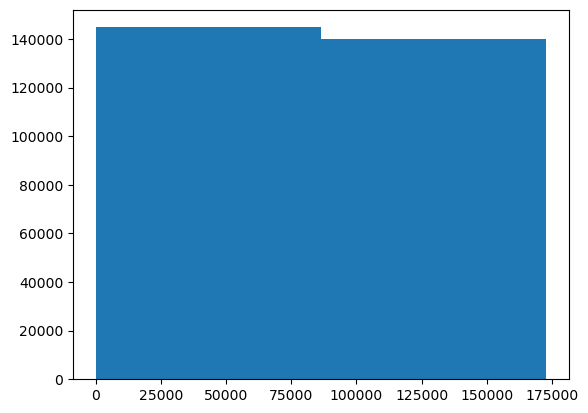

In [9]:
# target 데이터(class)의 분포를 확인합니다.
import matplotlib.pyplot as plt

plt.hist(data['Time'], bins=2)


In [12]:
# 모델 선택 및 학습

rfc = RandomForestClassifier()
lr = LogisticRegression()
dtc = DecisionTreeClassifier()
rfc.fit(X_train, y_train)
lr.fit(X_train, y_train)
dtc.fit(X_train, y_train)


c:\Users\humming\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTreeClassifier()

In [15]:
y_preds = rfc.predict(X_train)

In [24]:
# 정확도, 정밀도, F1 Score를 계산 및 출력합니다.
from sklearn.metrics import accuracy_score, f1_score, precision_score, roc_auc_score

y_preds = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred= y_preds)
precision = precision_score(y_test, y_pred= y_preds, average='weighted')
f1 = f1_score(y_test, y_pred= y_preds, average='weighted')


# AUC 점수를 계산합니다.
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9997
Precision: 0.9997
F1 Score: 0.9997


In [27]:
y_preds = rfc.predict_proba(X_test)
auc = roc_auc_score(y_test, y_preds[:, 1])

# 결과 출력
print(f"AUC Score: {auc:.4f}")


AUC Score: 0.9834


In [23]:
y_preds = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred= y_preds)
precision = precision_score(y_test, y_pred= y_preds, average='weighted')
f1 = f1_score(y_test, y_pred= y_preds, average='weighted')


# AUC 점수를 계산합니다.
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9991
Precision: 0.9991
F1 Score: 0.9991


## Decision Tree 로 직접해보기

In [ ]:
# 결정 트리 모델을 생성하고 학습합니다.

# 학습된 모델로 테스트 데이터를 예측하고 평가합니다.

# AUC 점수를 계산합니다.


## Random Forest 로 해보기

In [ ]:
# 랜덤 포레스트 모델을 생성하고 학습합니다.


# 학습된 모델로 테스트 데이터를 예측하고 평가합니다.

# AUC 점수를 계산합니다.


## 퀴즈) SVM 사용해보기